In [2]:
import pandas as pd
import numpy as np 

In [3]:
df = pd.read_csv('D:\\1-Data Science\\6 - Machine Learning\\Random Forest\\Data\\Fraud_check.csv')

In [4]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [5]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [8]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [9]:
bin_target = [float('-inf'), 30000, float('inf')]
bin_label = ['Risky', 'Good']

In [10]:
df['Taxable.Income'] = pd.cut(df['Taxable.Income'], bins=bin_target, labels=bin_label)

In [11]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


In [13]:
input = df.drop('Taxable.Income', axis = 'columns')
target = df["Taxable.Income"]

In [14]:
input

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,NO,Single,50047,10,YES
1,YES,Divorced,134075,18,YES
2,NO,Married,160205,30,YES
3,YES,Single,193264,15,YES
4,NO,Married,27533,28,NO
...,...,...,...,...,...
595,YES,Divorced,39492,7,YES
596,YES,Divorced,55369,2,YES
597,NO,Divorced,154058,0,YES
598,YES,Married,180083,17,NO


In [15]:
from sklearn.preprocessing import LabelEncoder

In [24]:
undergrad = LabelEncoder()
maritial_status = LabelEncoder()
work_experience = LabelEncoder()
urban = LabelEncoder()

In [25]:
input.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban', 'maritial_status', 'city_population', 'work_experience',
       'urban'],
      dtype='object')

In [26]:
input['Undergrad'] = undergrad.fit_transform(input['Undergrad'])
input['maritial_status'] = maritial_status.fit_transform(input['Marital.Status'])
input['work_experience'] = work_experience.fit_transform(input['Work.Experience'])
input['urban'] = urban.fit_transform(input['Urban'])

In [35]:
input_n = input.drop(['Undergrad', 'Marital.Status', 'city_population', 'Work.Experience',
       'Urban'], axis = 'columns')

In [36]:
input_n

,City.Population,maritial_status,work_experience,urban
0,50047,2,10,1
1,134075,0,18,1
2,160205,1,30,1
3,193264,2,15,1
4,27533,1,28,0
...,...,...,...,...
595,39492,0,7,1
596,55369,0,2,1
597,154058,0,0,1
598,180083,1,17,0


In [37]:
def norm(i):
    x = (i-i.min())/(i.max()-i.min())
    return x


In [39]:
input_n['city_population'] = norm(input_n['City.Population'])

In [41]:
input_n.drop('City.Population', axis ='columns')

,maritial_status,work_experience,urban,city_population
0,2,10,1,0.139472
1,0,18,1,0.622394
2,1,30,1,0.772568
3,2,15,1,0.962563
4,1,28,0,0.010081
...,...,...,...,...
595,0,7,1,0.078811
596,0,2,1,0.170058
597,0,0,1,0.737240
598,1,17,0,0.886810


In [42]:
target

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test , y_train, y_test = train_test_split(input_n, target, test_size=0.2)

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
model = RandomForestClassifier(n_estimators=25)

In [47]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=25)

In [48]:
model.score(X_test, y_test)

0.6916666666666667

In [50]:
pred = model.predict(X_test)
pred

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good

In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
cm = confusion_matrix(pred, y_test)

In [53]:
cm

array([[82, 28],
       [ 9,  1]], dtype=int64)

In [54]:
import matplotlib.pyplot as plt 
import seaborn as sns


Text(70.72222222222221, 0.5, 'Truth')

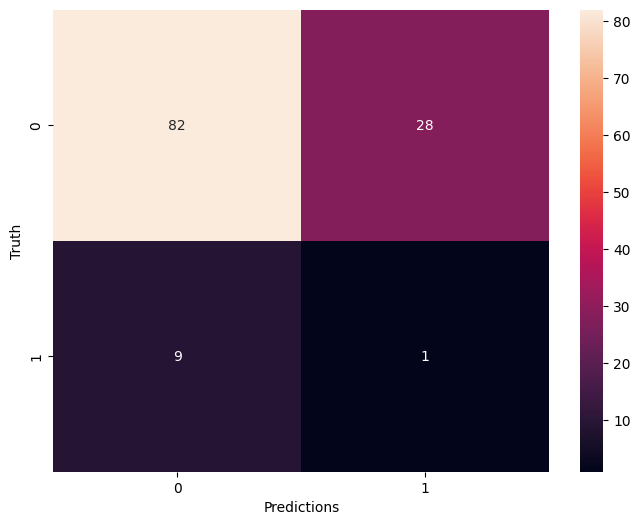

In [56]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot = True)
plt.xlabel('Predictions')
plt.ylabel("Truth")